In [1]:
#Install Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a pandas dataframe from the data file
df=pd.read_csv("hw.csv")
df.head()
df=pd.DataFrame(df)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#check the type of df
type(df)

pandas.core.frame.DataFrame

In [4]:
#Clean up the data (i.e. handle NA value)
#Checking for the Missing Data
df.isnull()

#drop for the Unnamed: 34
df=df.drop(['Unnamed: 34'],axis=1)

df.isnull().values.any()

True

In [5]:
#check for the null types
#check for withpre 
print(df["withpre"].isnull().value_counts())

#check for source
print(df["source"].isnull().value_counts())

#check for holddate need to drop the data
print(df["holddate"].isnull().value_counts())

#check for winloss need to drop the data
print(df["winloss"].isnull().value_counts())

#check for act_area need to drop the data
print(df["act_area"].isnull().value_counts())

#check for area need to drop the data
print(df["area"].isnull().value_counts())

#check for arearaw need to convert the none text type into 0
print(df["arearaw"].isnull().value_counts())

#check for sq_price need to convert the none text type into 0
print(df["sq_price"].isnull().value_counts())

#check for sq_actprice need to convert the none text type into 0
print(df["sq_actprice"].isnull().value_counts())

#check for block need to convert the none text type into 0
print(df["block"].isnull().value_counts())

#check for state need to convert the none text type into 0
print(df["state"].isnull().value_counts())

False    56436
True     23564
Name: withpre, dtype: int64
False    68444
True     11556
Name: source, dtype: int64
False    80000
Name: holddate, dtype: int64
False    80000
Name: winloss, dtype: int64
False    80000
Name: act_area, dtype: int64
False    80000
Name: area, dtype: int64
False    80000
Name: arearaw, dtype: int64
False    80000
Name: sq_price, dtype: int64
False    80000
Name: sq_actprice, dtype: int64
False    79511
True       489
Name: block, dtype: int64
False    76368
True      3632
Name: state, dtype: int64


In [6]:
#Using bfill for withpre
df["withpre"]=df["withpre"].fillna(method='ffill')

#Using bfill for source
df["source"]=df["source"].fillna(method='ffill')

In [7]:
print(df["withpre"].isnull().value_counts())
print(df["source"].isnull().value_counts())

False    80000
Name: withpre, dtype: int64
False    80000
Name: source, dtype: int64


In [8]:
#drop the NA Values
df=df.dropna()
df.head()
df.describe()

,withpre,id,rootid,fatherid,catid,memo,price_value,winloss_flag,sq_price_value,sq_actprice_value,day,date_y
count,75641.0,75641.000000,75641.0,75641.000000,75641.000000,7.564100e+04,7.564100e+04,75641.000000,75641.000000,75641.000000,75641.000000,75641.000000
mean,1.0,614419.727582,2.0,67.693024,5466.802171,1.725277e+13,7.256615e+06,0.322219,6466.293738,7812.576826,16.172882,2017.185706
std,0.0,43511.171910,0.0,13.320626,4536.886360,1.757910e+12,7.877543e+06,0.930629,6031.182834,8976.464420,8.624839,1.763474
min,1.0,550297.000000,2.0,52.000000,2000.000000,1.410270e+13,5.000000e+04,-1.000000,0.000000,0.000000,1.000000,2014.000000
25%,1.0,571632.000000,2.0,60.000000,2461.000000,1.604180e+13,3.860000e+06,-1.000000,0.000000,0.000000,9.000000,2016.000000
50%,1.0,617137.000000,2.0,67.000000,3070.000000,1.708080e+13,5.390000e+06,1.000000,7777.780000,0.000000,16.000000,2017.000000
75%,1.0,655922.000000,2.0,75.000000,7881.000000,1.902270e+13,8.000000e+06,1.000000,11168.640000,15617.130000,24.000000,2019.000000
max,1.0,683339.000000,2.0,131.000000,23557.000000,2.011270e+13,4.238000e+08,1.000000,79324.590000,104418.100000,31.000000,2020.000000


In [10]:
#Drop column that is not useful
df=df.drop(['withpre','id','rootid','fatherid','catid','url_father','url_cat','source','memo','price','winloss_flag','winloss','sq_price','sq_actprice','block','area','addr','room','state','holddate','contract'],axis=1)
df

,date,catname,catfathername,price_value,act_area,arearaw,sq_price_value,sq_actprice_value,month,day,date_dm,date_y,floor
0,2020-11-27,Bel Air Heights,Diamond Hill,10000000,657ft<sup>2</sup>,826,12106.54,15220.70,Nov,27,27/11,2020,2#
1,2020-11-27,Fa Yuen Plaza,Mong Kok,4280000,214ft<sup>2</sup>,347,12334.29,20000.00,Nov,27,27/11,2020,1#
2,2020-11-27,Caldecott Hill,Yau Yat Tsuen,11000000,991ft<sup>2</sup>,1282,8580.34,11099.90,Nov,27,27/11,2020,7
3,2020-11-27,Pang Ching Court,Wong Tai Sin,4900000,--,583,8404.80,0.00,Nov,27,27/11,2020,1#
4,2020-11-27,Metro Harbour View,Tai Kok Tsui,7150000,412ft<sup>2</sup>,595,12016.81,17354.37,Nov,27,27/11,2020,1#
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2014-10-27,Amoy Gardens,Kowloon Bay,4350000,391ft<sup>2</sup>,501,8682.63,11125.32,Oct,27,27/10,2014,2#
79996,2014-10-27,Marple Court,Kowloon Tong,7500000,678ft<sup>2</sup>,850,8823.53,11061.95,Oct,27,27/10,2014,9
79997,2014-10-27,Harbour Place,Hung Hom,6500000,481ft<sup>2</sup>,630,10317.46,13513.51,Oct,27,27/10,2014,4
79998,2014-10-27,Richland Gardens,Kowloon Bay,3790000,--,470,8063.83,0.00,Oct,27,27/10,2014,1#


In [11]:
#Rename column to a more meaningful name
df = df.rename({'date': 'Transaction Date','catname': 'estate','catfathername': 'District','price_value': 'price','sq_price_value': 'sq_price','sq_actprice_value': 'sq_actprice','date_y': 'Year','act_area': 'SFA','arearaw': 'GFA'}, axis=1)
df

,Transaction Date,estate,District,price,SFA,GFA,sq_price,sq_actprice,month,day,date_dm,Year,floor
0,2020-11-27,Bel Air Heights,Diamond Hill,10000000,657ft<sup>2</sup>,826,12106.54,15220.70,Nov,27,27/11,2020,2#
1,2020-11-27,Fa Yuen Plaza,Mong Kok,4280000,214ft<sup>2</sup>,347,12334.29,20000.00,Nov,27,27/11,2020,1#
2,2020-11-27,Caldecott Hill,Yau Yat Tsuen,11000000,991ft<sup>2</sup>,1282,8580.34,11099.90,Nov,27,27/11,2020,7
3,2020-11-27,Pang Ching Court,Wong Tai Sin,4900000,--,583,8404.80,0.00,Nov,27,27/11,2020,1#
4,2020-11-27,Metro Harbour View,Tai Kok Tsui,7150000,412ft<sup>2</sup>,595,12016.81,17354.37,Nov,27,27/11,2020,1#
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2014-10-27,Amoy Gardens,Kowloon Bay,4350000,391ft<sup>2</sup>,501,8682.63,11125.32,Oct,27,27/10,2014,2#
79996,2014-10-27,Marple Court,Kowloon Tong,7500000,678ft<sup>2</sup>,850,8823.53,11061.95,Oct,27,27/10,2014,9
79997,2014-10-27,Harbour Place,Hung Hom,6500000,481ft<sup>2</sup>,630,10317.46,13513.51,Oct,27,27/10,2014,4
79998,2014-10-27,Richland Gardens,Kowloon Bay,3790000,--,470,8063.83,0.00,Oct,27,27/10,2014,1#


In [12]:
#Make sure the transaction date's data type is numpy datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
type(df['Transaction Date'])

pandas.core.series.Series

In [13]:
#Question 2 Data Aggregation
df["Year"]=df["Year"].apply(str)
df["year_month"]=df["Year"]+" "+df["month"]
df["year_month"]

0        2020 Nov
1        2020 Nov
2        2020 Nov
3        2020 Nov
4        2020 Nov
           ...   
79995    2014 Oct
79996    2014 Oct
79997    2014 Oct
79998    2014 Oct
79999    2014 Oct
Name: year_month, Length: 75641, dtype: object

In [14]:
#check for the dftypes
df.dtypes

Transaction Date    datetime64[ns]
estate                      object
District                    object
price                        int64
SFA                         object
GFA                         object
sq_price                   float64
sq_actprice                float64
month                       object
day                          int64
date_dm                     object
Year                        object
floor                       object
year_month                  object
dtype: object

In [15]:
#for the district dataframe
monthly_average_unit_price_per_district=pd.DataFrame({'year_month':df["year_month"],'District':df["District"],'Average_Unit_Price_GFA':df["sq_price"],'Average_Unit_Price_SFA':df["sq_actprice"]})
monthly_average_unit_price_per_district=monthly_average_unit_price_per_district.groupby(['year_month','District'],as_index=False)["Average_Unit_Price_GFA","Average_Unit_Price_SFA","District"].mean()
monthly_average_unit_price_per_district

<ipython-input-15-36974de35704>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_average_unit_price_per_district=monthly_average_unit_price_per_district.groupby(['year_month','District'],as_index=False)["Average_Unit_Price_GFA","Average_Unit_Price_SFA","District"].mean()


,year_month,District,Average_Unit_Price_GFA,Average_Unit_Price_SFA
0,2014 Dec,Cheung Sha Wan,1158.513264,12037.886667
1,2014 Dec,Diamond Hill,7857.365333,8152.355333
2,2014 Dec,Ho Man Tin,5474.578596,6419.498421
3,2014 Dec,Hung Hom,8566.549789,5761.406211
4,2014 Dec,Jordan,5253.222439,2224.961463
...,...,...,...,...
2289,2020 Sep,Whampoa,13613.532000,14725.081429
2290,2020 Sep,Wong Tai Sin,8607.370270,2597.665135
2291,2020 Sep,Yau Ma Tei,8898.645000,1159.214000
2292,2020 Sep,Yau Tong,3441.290000,8262.220000


In [16]:
#for the estate
monthly_average_unit_price_per_estate=pd.DataFrame({'year_month':df["year_month"],'District':df["District"],'estate':df["estate"],'Average Unit_Price_GFA':df["sq_price"],'Average Unit_Price_SFA':df["sq_actprice"]})
monthly_average_unit_price_per_estate=monthly_average_unit_price_per_estate.groupby(['year_month','estate'],as_index=False)["Average Unit_Price_GFA","Average Unit_Price_SFA"].mean()
monthly_average_unit_price_per_estate

<ipython-input-16-0b957b47b6c4>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_average_unit_price_per_estate=monthly_average_unit_price_per_estate.groupby(['year_month','estate'],as_index=False)["Average Unit_Price_GFA","Average Unit_Price_SFA"].mean()


,year_month,estate,Average Unit_Price_GFA,Average Unit_Price_SFA
0,2014 Dec,104 Fa Yuen Street,0.000000,0.000
1,2014 Dec,8 Baker Court,10567.403333,0.000
2,2014 Dec,8 LaSalle,0.000000,28293.112
3,2014 Dec,Agatha Building,0.000000,0.000
4,2014 Dec,Alhambra Building,0.000000,0.000
...,...,...,...,...
31232,2020 Sep,Yuen Shing Building,0.000000,0.000
31233,2020 Sep,Yuet Lai Court,10224.030000,11923.990
31234,2020 Sep,Yuet Yiu Building,0.000000,0.000
31235,2020 Sep,Zebrano,12874.250000,0.000


In [17]:
#Question 3 - Data visualization

Text(0.5, 1.0, 'overall trend of property price of Kowloon')

<Figure size 1152x576 with 0 Axes>

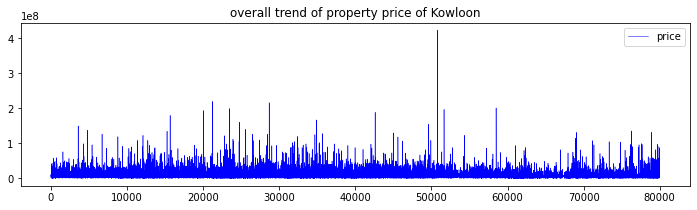

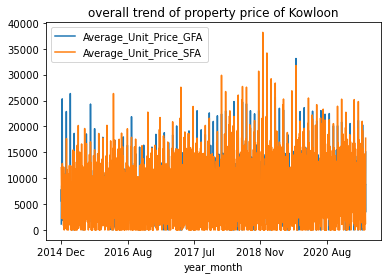

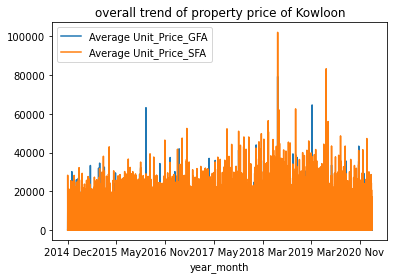

In [18]:
#Visualize the overall trend of property price of Kowloon.
plt.figure(figsize=(16,8))
df.plot.line(y='price',figsize=(12,3),color='blue',lw=0.5)
plt.title("overall trend of property price of Kowloon")

monthly_average_unit_price_per_district.plot(x='year_month')
plt.title("overall trend of property price of Kowloon")

monthly_average_unit_price_per_estate.plot(x='year_month')
plt.title("overall trend of property price of Kowloon")

In [18]:
#Select 5 districts and visualize the trend of their property price

<Figure size 1152x576 with 0 Axes>

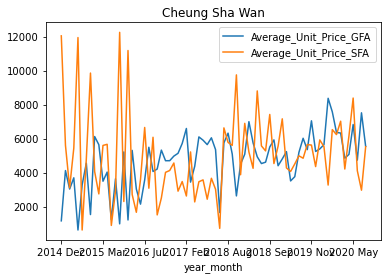

<Figure size 1152x576 with 0 Axes>

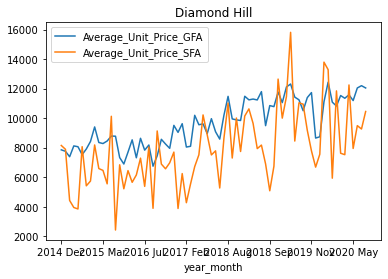

<Figure size 1152x576 with 0 Axes>

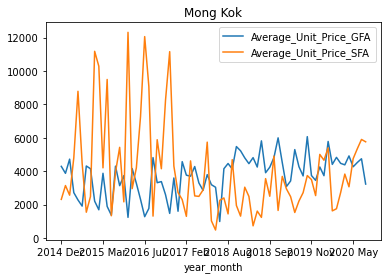

<Figure size 1152x576 with 0 Axes>

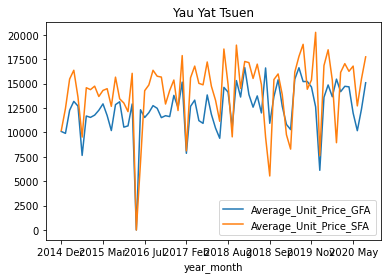

<Figure size 1152x576 with 0 Axes>

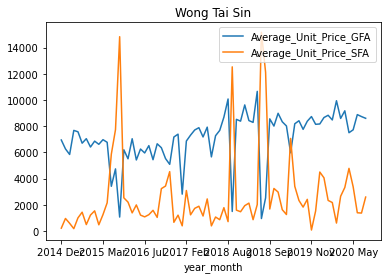

In [26]:
five_district=["Cheung Sha Wan","Diamond Hill","Mong Kok","Yau Yat Tsuen","Wong Tai Sin"]
for i in five_district:
    plt.figure(figsize=(16,8))
    monthly_average_unit_price_per_district[monthly_average_unit_price_per_district["District"]==i].plot(x='year_month')
    plt.title(i)

<Figure size 1152x576 with 0 Axes>

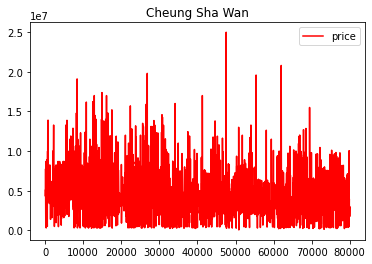

<Figure size 1152x576 with 0 Axes>

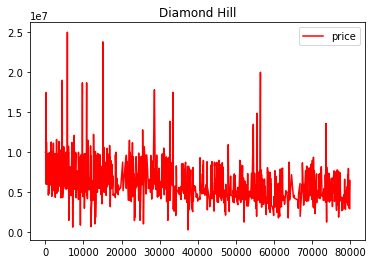

<Figure size 1152x576 with 0 Axes>

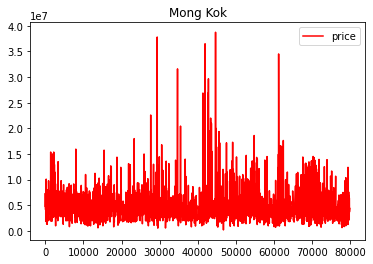

<Figure size 1152x576 with 0 Axes>

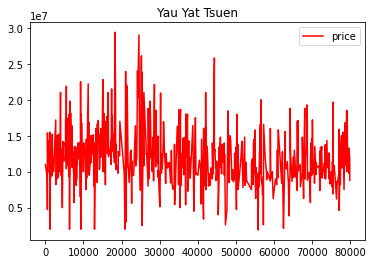

<Figure size 1152x576 with 0 Axes>

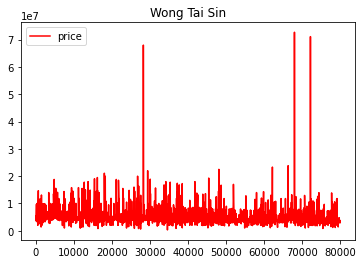

In [27]:
for i in five_district:
    plt.figure(figsize=(16,8))
    df[df["District"]==i].plot(y='price',color='red')
    plt.title(i)

<Figure size 1152x576 with 0 Axes>

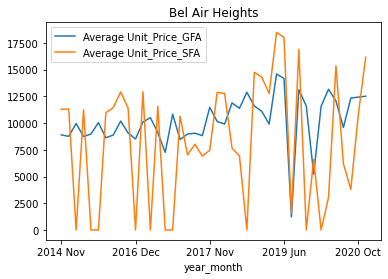

<Figure size 1152x576 with 0 Axes>

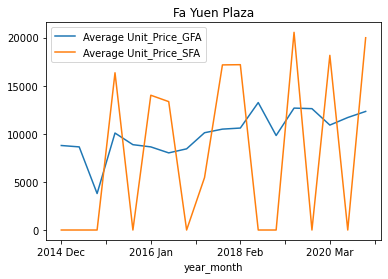

<Figure size 1152x576 with 0 Axes>

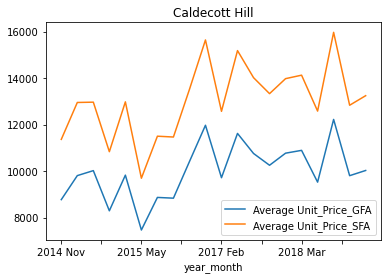

<Figure size 1152x576 with 0 Axes>

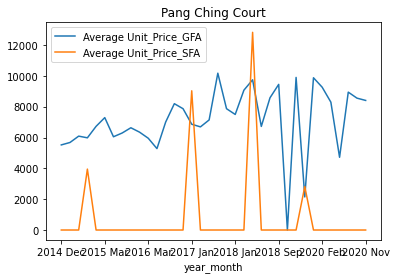

<Figure size 1152x576 with 0 Axes>

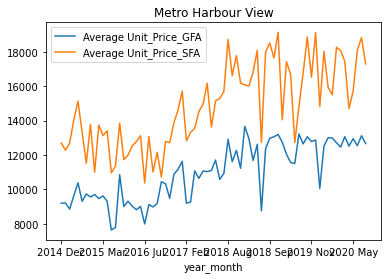

<Figure size 1152x576 with 0 Axes>

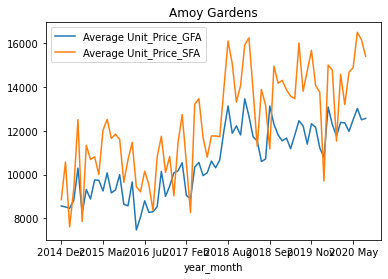

<Figure size 1152x576 with 0 Axes>

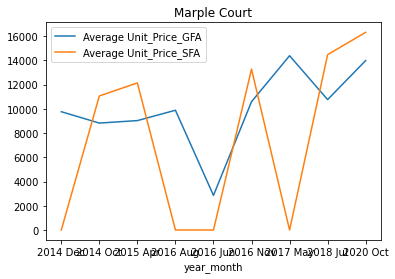

<Figure size 1152x576 with 0 Axes>

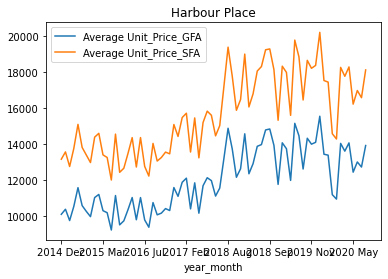

<Figure size 1152x576 with 0 Axes>

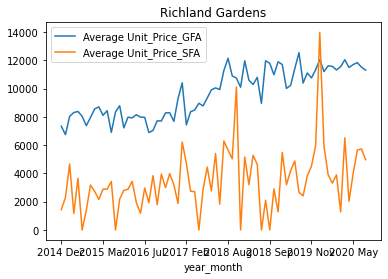

<Figure size 1152x576 with 0 Axes>

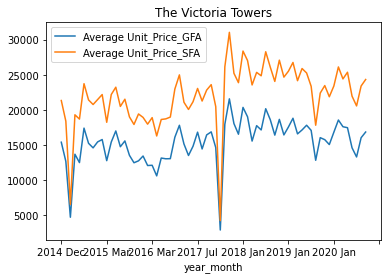

In [28]:
#Select 10 estates and visualize the trend of their property price
ten_district=["Bel Air Heights","Fa Yuen Plaza","Caldecott Hill","Pang Ching Court","Metro Harbour View","Amoy Gardens","Marple Court","Harbour Place","Richland Gardens","The Victoria Towers"]
for i in ten_district:
    plt.figure(figsize=(16,8))
    monthly_average_unit_price_per_estate[monthly_average_unit_price_per_estate["estate"]==i].plot(x='year_month')
    plt.title(i)


<Figure size 1152x576 with 0 Axes>

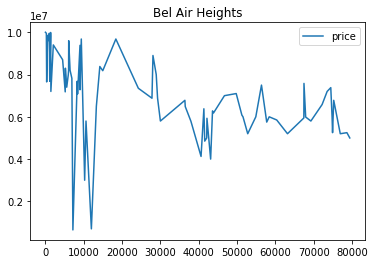

<Figure size 1152x576 with 0 Axes>

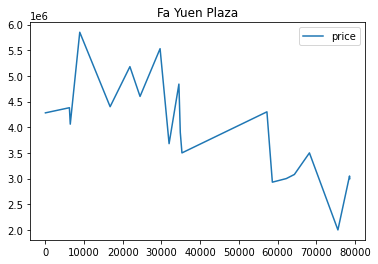

<Figure size 1152x576 with 0 Axes>

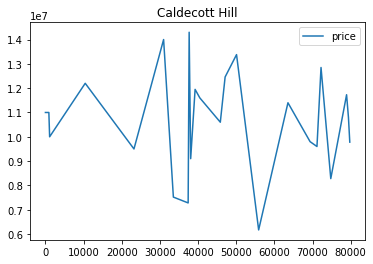

<Figure size 1152x576 with 0 Axes>

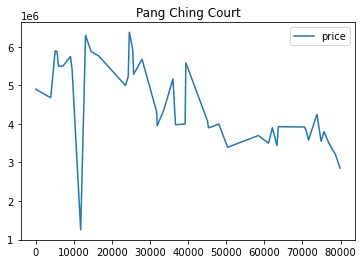

<Figure size 1152x576 with 0 Axes>

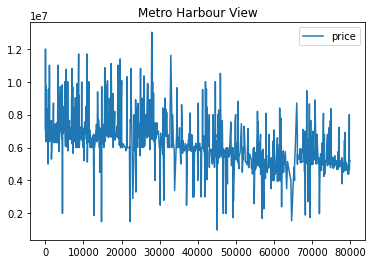

<Figure size 1152x576 with 0 Axes>

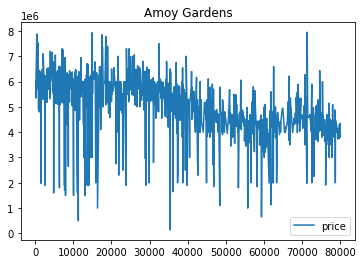

<Figure size 1152x576 with 0 Axes>

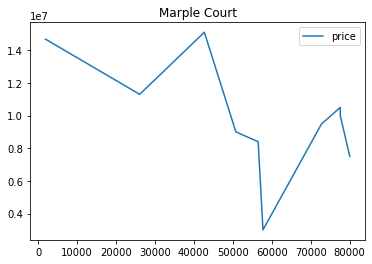

<Figure size 1152x576 with 0 Axes>

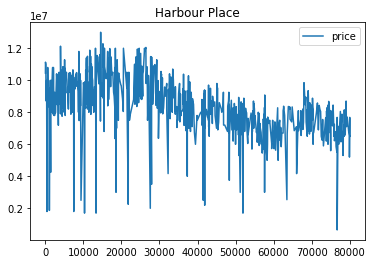

<Figure size 1152x576 with 0 Axes>

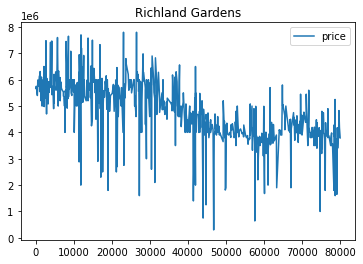

<Figure size 1152x576 with 0 Axes>

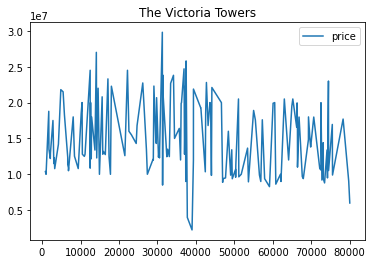

In [29]:
for i in ten_district:
    plt.figure(figsize=(16,8))
    df[df["estate"]==i].plot(y='price')
    plt.title(i)


In [30]:
#Question 4
#Import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
df.head()

df['SFA'] = df['SFA'].astype(str).str[-18:-14]
df['SFA']
#convert SFA and GFA into int type
df['SFA']=pd.to_numeric(df['SFA']).fillna(0)
df["GFA"]=df["GFA"].astype(str)
df[df["GFA"]=="None"]=0
df["GFA"]=pd.to_numeric(df['GFA']).fillna(0)

In [32]:
new_df=df.drop(labels=["estate","District","date_dm","year_month","month","floor"], axis="columns")
new_df

,Transaction Date,price,SFA,GFA,sq_price,sq_actprice,day,Year
0,2020-11-27 00:00:00,10000000,657.0,826,12106.54,15220.70,27,2020
1,2020-11-27 00:00:00,4280000,214.0,347,12334.29,20000.00,27,2020
2,2020-11-27 00:00:00,11000000,991.0,1282,8580.34,11099.90,27,2020
3,2020-11-27 00:00:00,4900000,0.0,583,8404.80,0.00,27,2020
4,2020-11-27 00:00:00,7150000,412.0,595,12016.81,17354.37,27,2020
...,...,...,...,...,...,...,...,...
79995,2014-10-27 00:00:00,4350000,391.0,501,8682.63,11125.32,27,2014
79996,2014-10-27 00:00:00,7500000,678.0,850,8823.53,11061.95,27,2014
79997,2014-10-27 00:00:00,6500000,481.0,630,10317.46,13513.51,27,2014
79998,2014-10-27 00:00:00,3790000,0.0,470,8063.83,0.00,27,2014


In [33]:
new_df.dtypes
new_df["Transaction Date"]=new_df['Transaction Date'].astype(str)
new_df.set_index("Transaction Date",inplace=True)

In [34]:
X = new_df.drop(['price'],axis=1)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

# model training

lm = LinearRegression()
lm.fit(X_train,y_train)

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
SFA,11385.712960
GFA,4796.922363
sq_price,-22.015175
sq_actprice,36.663592
day,765.486956
Year,4093.789175


Text(0, 0.5, 'Predicted Y')

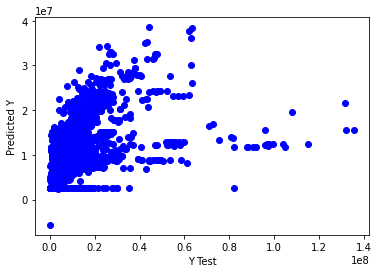

In [35]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


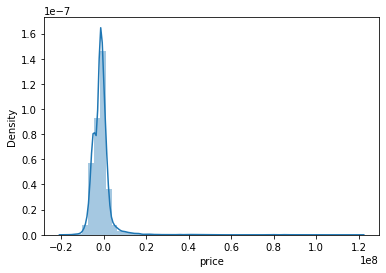

In [36]:
sns.distplot((y_test-predictions),bins=50);

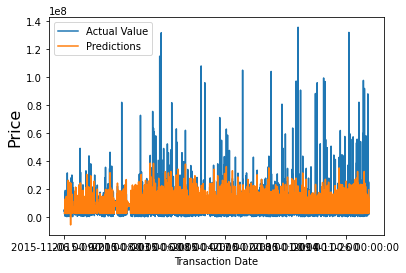

In [37]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
pred_df
pred_df.plot()
plt.ylabel('Price', fontsize=16)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2019)
ypred = lm.predict(Xtest)  #use the predict function

df2 = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
df2.head()

,Actual,Predicted
Transaction Date,,
2016-06-08 00:00:00,4500000,5.436049e+06
2015-06-15 00:00:00,3746000,1.166132e+07
2019-09-23 00:00:00,3200000,4.119656e+06
2019-04-02 00:00:00,5975000,6.973523e+06
2017-04-05 00:00:00,4680000,2.593229e+06


In [39]:
#Evaluation
from sklearn import metrics
r_sq = lm.score(X,y)
print(round(r_sq,4))

from sklearn.metrics import r2_score
yfit = lm.predict(Xtrain)
print(round(r2_score(ytrain,yfit),4))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.3369
0.3376
MAE: 3086906.52236392
MSE: 31406597303015.477
RMSE: 5604158.929136064


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness is 8.652109066152715
Kurtosis is 191.34460882893427


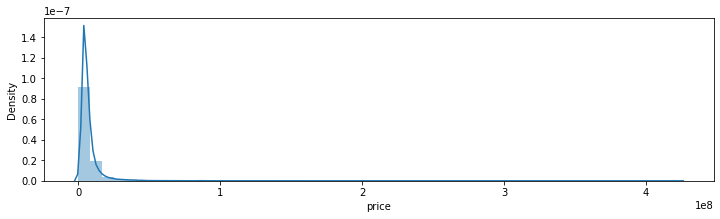

In [40]:
#Question 5 Data Analysis
fig=plt.figure(figsize=(12,3))

sns.distplot(df.price)

#plot about the skewness
print("skewness is {}".format(df.price.skew()))
print("Kurtosis is {}".format(df.price.kurt()))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


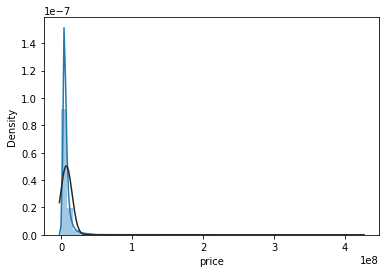

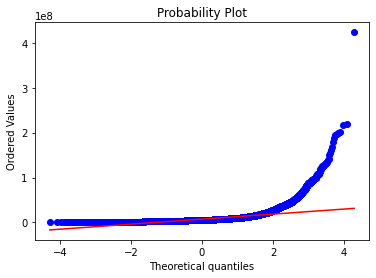

In [41]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
res=stats.probplot(df['price'], plot=plt)

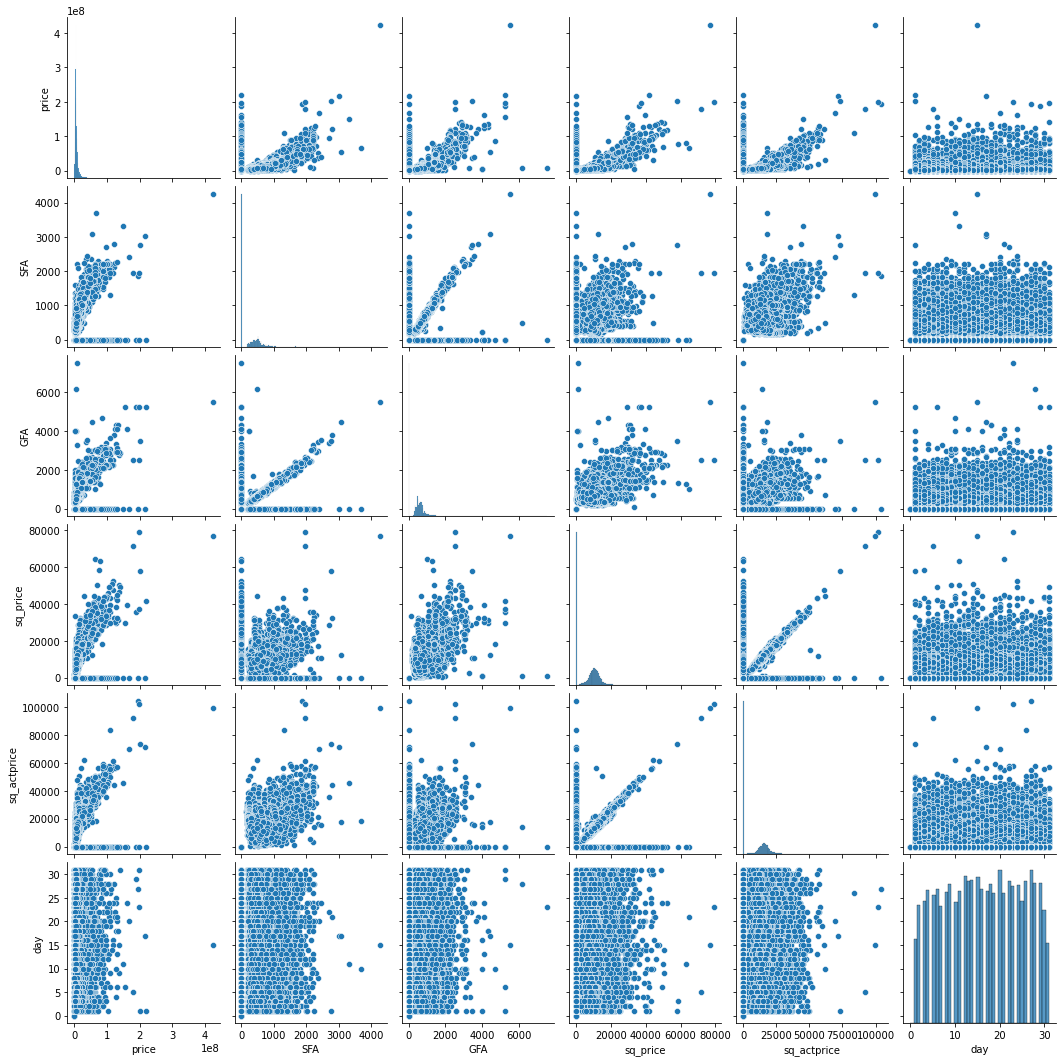

In [42]:
#for the pairplots
sns.pairplot(df)

<AxesSubplot:>

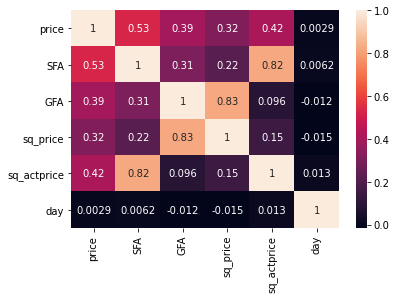

In [43]:
#for the heat map analysis
#price is mostly correlated with SFA and SGA however, little correlated with the day
sns.heatmap(df.corr(),annot=True)

In [44]:
#As for the district and the estates find the min and max

In [45]:

#Kowloon Tong and Tsim Sha Tsui have highest property
df.groupby('District')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
0,4.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Cheung Sha Wan,5394.0,4.811749e+06,2.422730e+06,50000.0,3387615.0,4502500.0,6111925.0,24990900.0
Diamond Hill,1007.0,6.060797e+06,2.409097e+06,300000.0,4374000.0,5600000.0,7500000.0,19000000.0
Ho Man Tin,5160.0,1.561992e+07,1.441699e+07,450000.0,7580000.0,11679550.0,16872300.0,216200000.0
Hung Hom,7487.0,7.239618e+06,6.477744e+06,380000.0,4064000.0,5550000.0,7980000.0,135000000.0
Jordan,1872.0,5.287819e+06,3.727235e+06,150000.0,3700000.0,4480000.0,5800000.0,36372000.0
Kai Tak,534.0,9.213664e+06,2.411788e+06,4918000.0,7812500.0,8773000.0,10391250.0,17000000.0
Kowloon Bay,3958.0,4.985873e+06,1.353977e+06,137500.0,4059250.0,4950000.0,5900000.0,9560000.0
Kowloon City,698.0,9.093281e+06,4.762358e+06,750000.0,5056250.0,8600000.0,12012600.0,31322159.0
